In [1]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline


from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm


from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

import pmdarima as pm
from pmdarima.model_selection import train_test_split

from fbprophet import Prophet

from pandas import to_datetime

import itertools
import warnings

import datetime
from datetime import datetime
warnings.filterwarnings('ignore')

c:\Users\pedro\anaconda3\envs\time_series\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
all_files = sorted(glob('mensal*.xlsx'))
df = pd.concat((pd.read_excel(file) for file in all_files), ignore_index=True)
df

,MÊS,PRODUTO,REGIÃO,ESTADO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PRECO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PRECO MÍNIMO REVENDA,PRECO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PRECO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PRECO MÍNIMO DISTRIBUIÇÃO,PRECO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2001-07-01,ETANOL HIDRATADO,NORTE,ACRE,110,R$/l,1.3320,0.02736,1.200,1.39,0.191,0.021,1.1409,0.04823,0.9,1.2,0.042
1,2001-07-01,ETANOL HIDRATADO,NORDESTE,ALAGOAS,258,R$/l,1.0225,0.08421,0.880,1.30,0.113,0.082,0.9097,0.07697,0.749,1.1264,0.085
2,2001-07-01,ETANOL HIDRATADO,NORTE,AMAPA,64,R$/l,1.3310,0.06519,0.881,1.43,0.208,0.049,1.1227,0.05072,0.8086,1.1973,0.045
3,2001-07-01,ETANOL HIDRATADO,NORTE,AMAZONAS,246,R$/l,1.2201,0.06885,1.120,1.39,0.166,0.056,1.0538,0.05349,0.78,1.1888,0.051
4,2001-07-01,ETANOL HIDRATADO,NORDESTE,BAHIA,665,R$/l,1.1533,0.07813,0.837,1.58,0.186,0.068,0.9671,0.07731,0.52,1.1736,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34808,2022-05-01,OLEO DIESEL S10,NORTE,RORAIMA,59,R$/l,7.1860,0.18700,6.830,7.59,-,0.026,-,-,-,-,-
34809,2022-05-01,OLEO DIESEL S10,SUL,SANTA CATARINA,800,R$/l,6.7880,0.25500,6.090,7.84,-,0.038,-,-,-,-,-
34810,2022-05-01,OLEO DIESEL S10,SUDESTE,SAO PAULO,5313,R$/l,6.8470,0.27600,5.899,8.22,-,0.040,-,-,-,-,-
34811,2022-05-01,OLEO DIESEL S10,NORDESTE,SERGIPE,205,R$/l,6.9820,0.28300,6.490,7.49,-,0.041,-,-,-,-,-


In [24]:
df.columns

Index(['MÊS', 'PRODUTO', 'REGIÃO', 'ESTADO', 'NÚMERO DE POSTOS PESQUISADOS',
       'UNIDADE DE MEDIDA', 'PRECO MÉDIO REVENDA', 'DESVIO PADRÃO REVENDA',
       'PRECO MÍNIMO REVENDA', 'PRECO MÁXIMO REVENDA', 'MARGEM MÉDIA REVENDA',
       'COEF DE VARIAÇÃO REVENDA', 'PRECO MÉDIO DISTRIBUIÇÃO',
       'DESVIO PADRÃO DISTRIBUIÇÃO', 'PRECO MÍNIMO DISTRIBUIÇÃO',
       'PRECO MÁXIMO DISTRIBUIÇÃO', 'COEF DE VARIAÇÃO DISTRIBUIÇÃO'],
      dtype='object')

In [32]:
df_etanol = df[df['PRODUTO'] == 'ETANOL HIDRATADO']


In [33]:
df_etanol

,MÊS,PRODUTO,REGIÃO,ESTADO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PRECO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PRECO MÍNIMO REVENDA,PRECO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PRECO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PRECO MÍNIMO DISTRIBUIÇÃO,PRECO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2001-07-01,ETANOL HIDRATADO,NORTE,ACRE,110,R$/l,1.3320,0.02736,1.200,1.39,0.191,0.021,1.1409,0.04823,0.9,1.2,0.042
1,2001-07-01,ETANOL HIDRATADO,NORDESTE,ALAGOAS,258,R$/l,1.0225,0.08421,0.880,1.30,0.113,0.082,0.9097,0.07697,0.749,1.1264,0.085
2,2001-07-01,ETANOL HIDRATADO,NORTE,AMAPA,64,R$/l,1.3310,0.06519,0.881,1.43,0.208,0.049,1.1227,0.05072,0.8086,1.1973,0.045
3,2001-07-01,ETANOL HIDRATADO,NORTE,AMAZONAS,246,R$/l,1.2201,0.06885,1.120,1.39,0.166,0.056,1.0538,0.05349,0.78,1.1888,0.051
4,2001-07-01,ETANOL HIDRATADO,NORDESTE,BAHIA,665,R$/l,1.1533,0.07813,0.837,1.58,0.186,0.068,0.9671,0.07731,0.52,1.1736,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34655,2022-05-01,ETANOL HIDRATADO,NORTE,RORAIMA,12,R$/l,6.2070,0.19900,5.990,6.50,-,0.032,-,-,-,-,-
34656,2022-05-01,ETANOL HIDRATADO,SUL,SANTA CATARINA,554,R$/l,6.4120,0.30400,5.399,7.45,-,0.047,-,-,-,-,-
34657,2022-05-01,ETANOL HIDRATADO,SUDESTE,SAO PAULO,6920,R$/l,4.9910,0.29100,4.170,7.49,-,0.058,-,-,-,-,-
34658,2022-05-01,ETANOL HIDRATADO,NORDESTE,SERGIPE,173,R$/l,6.1250,0.11600,5.850,6.51,-,0.019,-,-,-,-,-


In [34]:
df_etanol.isnull().sum()

MÊS                              0
PRODUTO                          0
REGIÃO                           0
ESTADO                           0
NÚMERO DE POSTOS PESQUISADOS     0
UNIDADE DE MEDIDA                0
PRECO MÉDIO REVENDA              0
DESVIO PADRÃO REVENDA            0
PRECO MÍNIMO REVENDA             0
PRECO MÁXIMO REVENDA             0
MARGEM MÉDIA REVENDA             0
COEF DE VARIAÇÃO REVENDA         0
PRECO MÉDIO DISTRIBUIÇÃO         0
DESVIO PADRÃO DISTRIBUIÇÃO       0
PRECO MÍNIMO DISTRIBUIÇÃO        0
PRECO MÁXIMO DISTRIBUIÇÃO        0
COEF DE VARIAÇÃO DISTRIBUIÇÃO    0
dtype: int64

In [29]:
df_etanol.columns

Index(['MÊS', 'PRODUTO', 'REGIÃO', 'ESTADO', 'NÚMERO DE POSTOS PESQUISADOS',
       'UNIDADE DE MEDIDA', 'PRECO MÉDIO REVENDA', 'DESVIO PADRÃO REVENDA',
       'PRECO MÍNIMO REVENDA', 'PRECO MÁXIMO REVENDA', 'MARGEM MÉDIA REVENDA',
       'COEF DE VARIAÇÃO REVENDA', 'PRECO MÉDIO DISTRIBUIÇÃO',
       'DESVIO PADRÃO DISTRIBUIÇÃO', 'PRECO MÍNIMO DISTRIBUIÇÃO',
       'PRECO MÁXIMO DISTRIBUIÇÃO', 'COEF DE VARIAÇÃO DISTRIBUIÇÃO'],
      dtype='object')

In [35]:
df_etanol.drop(['REGIÃO', 'NÚMERO DE POSTOS PESQUISADOS',
       'UNIDADE DE MEDIDA', 'DESVIO PADRÃO REVENDA',
       'PRECO MÍNIMO REVENDA', 'PRECO MÁXIMO REVENDA', 'MARGEM MÉDIA REVENDA',
       'COEF DE VARIAÇÃO REVENDA', 'PRECO MÉDIO DISTRIBUIÇÃO',
       'DESVIO PADRÃO DISTRIBUIÇÃO', 'PRECO MÍNIMO DISTRIBUIÇÃO',
       'PRECO MÁXIMO DISTRIBUIÇÃO', 'COEF DE VARIAÇÃO DISTRIBUIÇÃO'], axis=1, inplace=True)

In [36]:
df_etanol

,MÊS,PRODUTO,ESTADO,PRECO MÉDIO REVENDA
0,2001-07-01,ETANOL HIDRATADO,ACRE,1.3320
1,2001-07-01,ETANOL HIDRATADO,ALAGOAS,1.0225
2,2001-07-01,ETANOL HIDRATADO,AMAPA,1.3310
3,2001-07-01,ETANOL HIDRATADO,AMAZONAS,1.2201
4,2001-07-01,ETANOL HIDRATADO,BAHIA,1.1533
...,...,...,...,...
34655,2022-05-01,ETANOL HIDRATADO,RORAIMA,6.2070
34656,2022-05-01,ETANOL HIDRATADO,SANTA CATARINA,6.4120
34657,2022-05-01,ETANOL HIDRATADO,SAO PAULO,4.9910
34658,2022-05-01,ETANOL HIDRATADO,SERGIPE,6.1250


In [37]:
df_etanol['MÊS'] = pd.to_datetime(df_etanol['MÊS'])

In [38]:
df_etanol.dtypes

MÊS                    datetime64[ns]
PRODUTO                        object
ESTADO                         object
PRECO MÉDIO REVENDA           float64
dtype: object

In [44]:
X_train = df_etanol[df_etanol['MÊS'] < '2017-01-01']
X_valid = df_etanol[df_etanol['MÊS'] >= '2017-01-01']

print('X_train Shape', X_train.shape)
print('X_Valid Shape', X_valid.shape)

X_train['MÊS'].unique()

X_train Shape (5019, 4)
X_Valid Shape (1715, 4)


array(['2001-07-01T00:00:00.000000000', '2001-08-01T00:00:00.000000000',
       '2001-09-01T00:00:00.000000000', '2001-10-01T00:00:00.000000000',
       '2001-11-01T00:00:00.000000000', '2001-12-01T00:00:00.000000000',
       '2002-01-01T00:00:00.000000000', '2002-02-01T00:00:00.000000000',
       '2002-03-01T00:00:00.000000000', '2002-04-01T00:00:00.000000000',
       '2002-05-01T00:00:00.000000000', '2002-06-01T00:00:00.000000000',
       '2002-07-01T00:00:00.000000000', '2002-08-01T00:00:00.000000000',
       '2002-09-01T00:00:00.000000000', '2002-10-01T00:00:00.000000000',
       '2002-11-01T00:00:00.000000000', '2002-12-01T00:00:00.000000000',
       '2003-01-01T00:00:00.000000000', '2003-02-01T00:00:00.000000000',
       '2003-03-01T00:00:00.000000000', '2003-04-01T00:00:00.000000000',
       '2003-05-01T00:00:00.000000000', '2003-06-01T00:00:00.000000000',
       '2003-07-01T00:00:00.000000000', '2003-08-01T00:00:00.000000000',
       '2003-09-01T00:00:00.000000000', '2003-10-01

Parei aqui

In [45]:
df_etanol

,MÊS,PRODUTO,ESTADO,PRECO MÉDIO REVENDA
0,2001-07-01,ETANOL HIDRATADO,ACRE,1.3320
1,2001-07-01,ETANOL HIDRATADO,ALAGOAS,1.0225
2,2001-07-01,ETANOL HIDRATADO,AMAPA,1.3310
3,2001-07-01,ETANOL HIDRATADO,AMAZONAS,1.2201
4,2001-07-01,ETANOL HIDRATADO,BAHIA,1.1533
...,...,...,...,...
34655,2022-05-01,ETANOL HIDRATADO,RORAIMA,6.2070
34656,2022-05-01,ETANOL HIDRATADO,SANTA CATARINA,6.4120
34657,2022-05-01,ETANOL HIDRATADO,SAO PAULO,4.9910
34658,2022-05-01,ETANOL HIDRATADO,SERGIPE,6.1250


In [47]:
df_etanol.columns

Index(['MÊS', 'PRODUTO', 'ESTADO', 'PRECO MÉDIO REVENDA'], dtype='object')

In [48]:
sp = X_train[X_train['ESTADO'] == 'SAO PAULO']
sp2 = sp[['MÊS', 'PRECO MÉDIO REVENDA']]

sp_v = X_valid[X_valid['ESTADO'] == 'SAO PAULO']
sp_v2 = sp_v[['MÊS', 'PRECO MÉDIO REVENDA']]

In [49]:
sp2.set_index('MÊS', inplace=True)
sp_v2.set_index('MÊS', inplace=True)

In [56]:
index_3_months = pd.date_range(sp2.index[-1], freq='M', periods=64)

In [51]:
index_3_months

DatetimeIndex(['2016-12-31', '2017-01-31', '2017-02-28'], dtype='datetime64[ns]', freq='M')

ARIMA

In [52]:
sp2

,PRECO MÉDIO REVENDA
MÊS,
2001-07-01,0.8757
2001-08-01,0.8679
2001-09-01,0.8693
2001-10-01,0.8802
2001-11-01,0.8756
...,...
2016-08-01,2.2840
2016-09-01,2.3190
2016-10-01,2.5250


AttributeError: 'numpy.float64' object has no attribute 'plot'

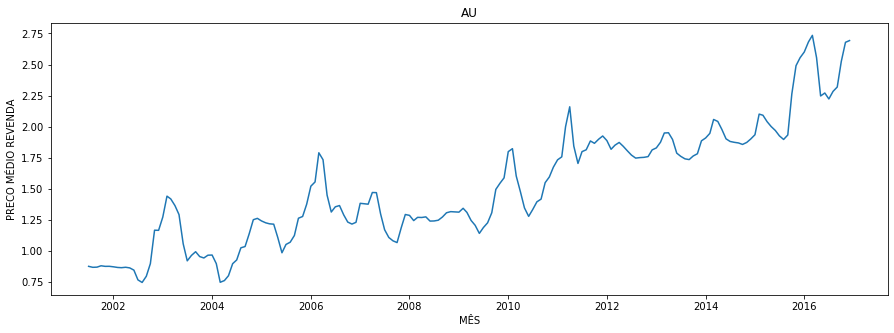

In [61]:
# Running ARIMA with random numbers
model_arima = ARIMA(sp2, order=(2,0,0)) # start 2-0-0 and move to the best
model_arima_fit = model_arima.fit()

# Saving ARIMA predictions
fcast1 = model_arima_fit.predict(64)[0]

# Passing the same index as the others
#fcast1 = pd.Series(fcast1, index=index_3_months)
#fcast1 = fcast1.rename("Arima") 

# Ploting the predictions
fig, ax = plt.subplots(figsize=(15,5))
chart = sns.lineplot(x='MÊS', y='PRECO MÉDIO REVENDA', data = sp)
chart.set_title('AU')
fcast1.plot(ax=ax, color='red', marker="o", legend=True)
sp_v2.plot(ax=ax, color='blue', marker="o", legend=True)

# Printing the AI
print('The MSE of ARIMA is:', mean_squared_error(sp_v['PRECO MÉDIO REVENDA'].values, fcast1.values, squared=False))

<AxesSubplot:title={'center':'AU'}, xlabel='MÊS', ylabel='PRECO MÉDIO REVENDA'>

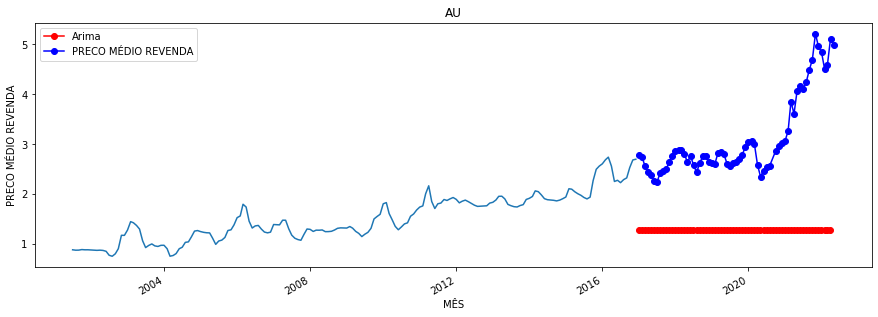

In [58]:
model_arima = sm.tsa.statespace.SARIMAX(sp2, order=(1,1,1), seasonal_order=(1,1,1,12))
model_arima_fit = model_arima.fit()

fcast1 = model_arima_fit.predict(64, dynamic=True)[0]

fcast1 = pd.Series(fcast1, index= index_3_months)
fcast1 = fcast1.rename("Arima") 

fig, ax = plt.subplots(figsize=(15,5))
chart = sns.lineplot(x='MÊS', y='PRECO MÉDIO REVENDA', data = sp)
chart.set_title('AU')
fcast1.plot(ax=ax, color='red', marker="o", legend=True)
sp_v2.plot(ax=ax, color='blue', marker="o", legend=True)

In [62]:
fcast1.columns

AttributeError: 'numpy.float64' object has no attribute 'columns'

In [ ]:
df_etanol

In [66]:
df_etanol = df_etanol[df_etanol['ESTADO'] == 'SAO PAULO']
df_etanol = df_etanol[['MÊS', 'PRECO MÉDIO REVENDA']]
df_etanol

KeyError: 'ESTADO'

In [68]:
df_etanol.set_index('MÊS', inplace=True)

In [69]:
df_etanol

,PRECO MÉDIO REVENDA
MÊS,
2001-07-01,0.8757
2001-08-01,0.8679
2001-09-01,0.8693
2001-10-01,0.8802
2001-11-01,0.8756
...,...
2022-01-01,4.8420
2022-02-01,4.4990
2022-03-01,4.5890


<AxesSubplot:xlabel='MÊS'>

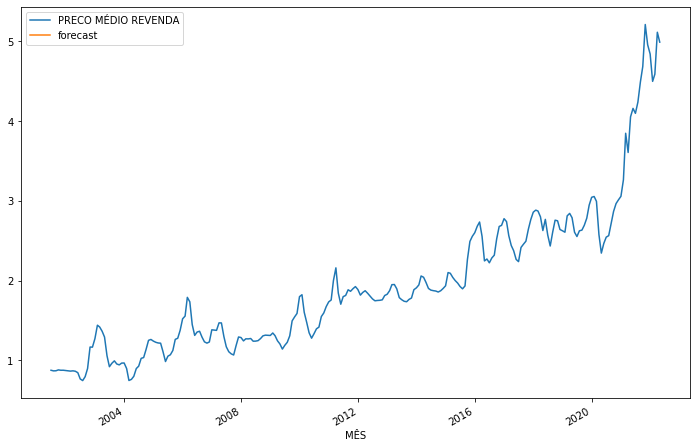

In [74]:
model=sm.tsa.statespace.SARIMAX(df_etanol['PRECO MÉDIO REVENDA'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

df_etanol['forecast']=results.predict(start=188,end=250,dynamic=True)
df_etanol[['PRECO MÉDIO REVENDA','forecast']].plot(figsize=(12,8))

In [73]:
df_etanol['forecast']

MÊS
2001-07-01   NaN
2001-08-01   NaN
2001-09-01   NaN
2001-10-01   NaN
2001-11-01   NaN
              ..
2022-01-01   NaN
2022-02-01   NaN
2022-03-01   NaN
2022-04-01   NaN
2022-05-01   NaN
Name: forecast, Length: 250, dtype: float64